In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # I like this style better for plotting

In [3]:
!ls data

shipping_data.csv


First thing first, let's have a look at the dataframe.

In [6]:
df = pd.read_csv('data/shipping_data.csv')

In [7]:
df

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
0,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",departure,Vessel departure from transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",ais,2024-06-29 07:15:06.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
1,09dbaf79-6a76-4efd-a511-663cf9cdd1c2,2024-06-21 22:16:30.000 Z,511e6a19-f4a8-40f0-a7c4-5e1e4d5e90ca,2024-07-30 10:08:45.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Itapoa"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Hong Kong"",\n...",ais,2024-06-18 07:44:20.000 Z,False,PIDU4240363,"{\n ""imo"": ""9793959"",\n ""mmsi"": ""477233200"",...",Pacific International Lines
2,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Inbound/Outbound Laden Ctnr Move From One Pier...,Gate out,Truck,"{\n ""bic_cd"": null,\n ""city"": null,\n ""coun...",carrier,2024-06-29 00:50:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
3,924b8c26-7f7a-419b-9d81-c4857a918b8e,2024-06-17 16:50:59.000 Z,2c5eb28d-67fb-4114-9ee3-47cafc7620f7,2024-08-12 16:34:34.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Mobile"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Rotterdam"",\n...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Veracruz"",\n ...",ais,2024-06-06 11:14:46.000 Z,False,SUDU5331459,"{\n ""imo"": ""9535163"",\n ""mmsi"": ""477346500"",...",Hamburg-Süd
4,001dd4c8-ac21-4042-b762-b6650815b649,2024-06-13 07:00:23.000 Z,bb20cbf7-52b1-48c7-bf10-776dced41dea,2024-07-03 20:19:47.000 Z,"{\n ""city"": ""Savannah"",\n ""country"": ""United...","{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",Laden Ctnr Loaded On Board Vessel.(Mother Vess...,Loaded on vessel at origin port,Vessel,"{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",carrier,2024-06-15 01:12:00.000 Z,False,WHLU5809684,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196198,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-04 11:14:31.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196199,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Ningbo"",\n ""...",ais,2024-06-26 10:14:40.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196200,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-06 02:29:10.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196201,0041c459-2

My immediate impression is that the `reference_id` will be useful for matching up the same shipment as it gets updated. I'm going to try to sort by that to verify my understanding.

In [17]:
df.dtypes

REFERENCE_ID            object
REFERENCE_CREATED_AT    object
REFERENCE_UPDATE_ID     object
DATA_UPDATED_AT         object
DESTINATION_PORT        object
ORIGIN_PORT             object
RAW_DESCRIPTION         object
EVENT_DESCRIPTION       object
EVENT_MODE              object
EVENT_LOCATION          object
EVENT_SOURCE            object
EVENT_TIMESTAMP         object
PLANNED                 object
CONTAINER_ID            object
RELATED_VESSEL          object
CARRIER_NAME            object
dtype: object

In [28]:
print(len(df), len(df[df['PLANNED']==True]), len(df[df['PLANNED']==True])/len(df))

196203 36170 0.18434988251963527


About 20% of the events are planned, meaning they haven't occured yet, I'm planning on distinguishing between planned and actually occured throughout this exercise.

In [21]:
df['REFERENCE_ID'].nunique()

578

In [26]:
df[df['PLANNED']==False]['REFERENCE_ID'].nunique()

578

REFERENCE_ID
005f3f35-add9-45b3-9e51-c57f26a27f1a    3456
58bbae2e-03d0-4cea-8644-479d0d8281cf    3222
00424cd6-a9c7-4f4a-9277-2c9e9bf46574    2355
00805026-2aa1-4627-b585-3c2b150b51a8    2273
0041c459-27e8-4476-9620-d7ecf54319e8    2269
                                        ... 
012586a9-dc10-4172-a9a3-2d5e298c6a4b       2
0f16aa0b-12a8-4feb-91d6-fec08f7bd203       1
006fd8eb-411d-434a-86a5-d2c3ae900e91       1
00b5ebeb-bea0-41d2-bac2-264ff4bf3094       1
01799592-657a-48fc-b876-01d3b2810182       1
Name: count, Length: 578, dtype: int64


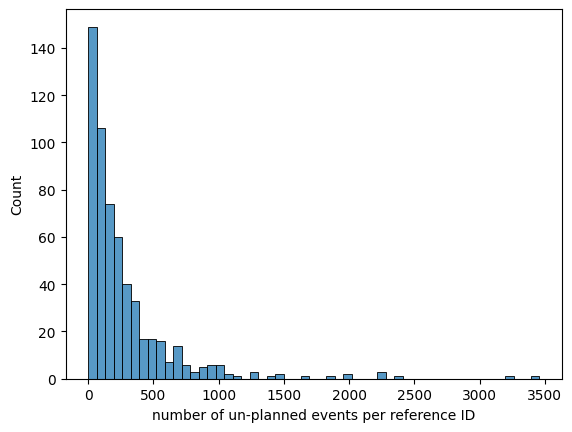

In [36]:
repeated_refs = df[df['PLANNED']==False]['REFERENCE_ID'].value_counts()
print(repeated_refs)
sns.histplot(repeated_refs)
plt.xlabel('number of un-planned events per reference ID')
plt.show()

There are 578 unique reference IDs. And some of these have up to 3000-ish unplanned (actually occuring) updates.

### Task 1:

There are eight core events expected to occur for each journey identified by “reference_id”. What are the rates for how often these events are present for each shipment? You may need to consider whether the container journey is completed for more recent shipments.

- overall
- overall per ocean carrier
- per each of the 8 core events overall
- per each of the 8 core events per ocean carrier

To get an idea of how to scale this sort of question, I'll first look at just the first reference ID.